# Web Scraping with Beautiful Soup

## Introduction

The web is full of great datasets, but not all of them are readily available for download and analysis.
Today we'll take a look at how you can surf the web robotically, saving the relevant information into storage containers as you go!

We'll be taking a look at two main packages:
* Beautiful Soup
* Pandas

Our general approach will be:
* pick a domain/set of web pages to scrape
* investigate those web pages using the developers tools from your web browser (such as Chrome or Firefox)
* write rules to select the relevant objects from the DOM
* parse information from those objects and store it in a container

## Objectives
You will be able to:
* Scrape static webpages
* Select specific elements from the DOM

## Web Page Introduction: **The DOM + HTML**

Before we start scraping, having a little background about how web pages are formatted is very helpful.

"The Document Object Model (DOM) is a programming interface for HTML and XML documents. It represents the page so that programs can change the document structure, style, and content. The DOM represents the document as nodes and objects. That way, programming languages can connect to the page." Amongst other things, this allows programming languages such as javascript to interactively change the page and HTML!  

What you'll see is the DOM and HTML create a hierarchy of elements. This structure and the underlying elements can be naviagated similar to a family tree which is one of Beautiful Soups main mechanisms for naviagation; once you select a specific element within a page you can then navigate to successive elements using methods such as sibling, parent or descendents.
  
To learn more about the DOM see:  
https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction

![](./images/DOM-model.svg.png)

## Beautiful Soup   
https://www.crummy.com/software/BeautifulSoup/bs4/doc/   

Beautiful Soup is a Python library designed for quick turnaround projects like screen-scraping. Three features make it powerful:

* Beautiful Soup provides a few simple methods and Pythonic idioms for navigating, searching, and modifying a parse tree: a toolkit for dissecting a document and extracting what you need. It doesn't take much code to write an application

* Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and Beautiful Soup can't detect one. Then you just have to specify the original encoding.

* Beautiful Soup sits on top of popular Python parsers like lxml and html5lib, allowing you to try out different parsing strategies or trade speed for flexibility.

Beautiful Soup parses anything you give it, and does the tree traversal stuff for you. You can tell it "Find all the links", or "Find all the links of class externalLink", or "Find all the links whose urls match "foo.com", or "Find the table heading that's got bold text, then give me that text."

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

## An example webpage

In [2]:
with open('sample_page.html') as f:
    soup = BeautifulSoup(f, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link2">
    Tillie
   </a>
   ; and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


#### A few introductory Beautiful Soup Selections...

In [3]:
print(soup.title)
# <title>The Dormouse's story</title>

print(soup.title.name)
# u'title'

print(soup.title.string)
# u'The Dormouse's story'

print(soup.title.parent.name)
# u'head'

print(soup.p)
# <p class="title"><b>The Dormouse's story</b></p>

print(soup.p['class'])
# u'title'

print(soup.a)
# <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

print(soup.find_all('a'))
# [<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
#  <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
#  <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

print(soup.find(id="link3"))
# <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

<title>
    The Dormouse's story
   </title>
title

    The Dormouse's story
   
head
<p class="title">
<b>
     The Dormouse's story
    </b>
</p>
['title']
<a class="sister" href="http://example.com/elsie" id="link1">
     Elsie
    </a>
[<a class="sister" href="http://example.com/elsie" id="link1">
     Elsie
    </a>, <a class="sister" href="http://example.com/lacie" id="link2">
     Lacie
    </a>, <a class="sister" href="http://example.com/tillie" id="link2">
     Tillie
    </a>]
None


## Grabbing a Web Page

In [4]:
html_page = requests.get('https://www.azlyrics.com/') #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [5]:
#Preview the soup....MMMMMM SOUP :)
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="noarchive" name="robots"/>
  <meta content="AZLyrics" name="name"/>
  <meta content="lyrics,music,song lyrics,songs,paroles" name="keywords"/>
  <base href="//www.azlyrics.com"/>
  <script src="//www.azlyrics.com/external.js" type="text/javascript">
  </script>
  <title>
   AZLyrics - Song Lyrics from A to Z
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
      <script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script>
    <![endif]-->
  <


### Inspecting the Web Page for Relevant Elements

Here's the page itself:

![](./images/home_page.png)

## Parsing the DOM

### soup.findAll()

One common method we'll be use to navigate through the web page to extract information of interest is the soup.findAll() method.

**Here's the docstring which you can bring up by typing (soup.findAll? [shift+enter])**  

soup.findAll(name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs)  

Docstring:
Extracts a list of Tag objects that match the given
criteria.  You can specify the name of the Tag and any
attributes you want the Tag to have.   

The value of a key-value pair in the 'attrs' map can be a
string, a list of strings, a regular expression object, or a
callable that takes a string and returns whether or not the
string matches for some custom definition of 'matches'. The
same is true of the tag name.

In [6]:
#Get all the hyperlinks on a page
links = soup.findAll('a')
links[25:35]

[<a class="btn btn-menu" href="//www.azlyrics.com/y.html">Y</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/z.html">Z</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/19.html">#</a>,
 <a href="/a/ajr.html#66485"><img alt="" src="/hot/66485.jpg"/></a>,
 <a href="/a/ajr.html#66485">AJR</a>,
 <a href="/b/bearsden.html#65420"><img alt="" src="/hot/65420.jpg"/></a>,
 <a href="/b/bearsden.html#65420">Bear's Den</a>,
 <a href="/b/blackbear.html#64548"><img alt="" src="/hot/64548.jpg"/></a>,
 <a href="/b/blackbear.html#64548">blackbear</a>,
 <a href="/c/catfishandthebottlemen.html#65884"><img alt="" src="/hot/65884.jpg"/></a>]

## Lets pull one of the link pages and see what we can get!  
**Notice that these are relative links that all refer to pages and subdirectories within the azlyrics domain.**  
We'll have to be sure to account for this when pulling successive pages.

In [7]:
link = links[35]
url_base = 'https://www.azlyrics.com/'
url_ext = link.get('href')
html_page = requests.get(url_base + url_ext)
soup = BeautifulSoup(html_page.content, 'html.parser')
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
  <meta content='Catfish And The Bottlemen lyrics - 53 song lyrics sorted by album, including "Mission", "Sidetrack", "Basically".' name="description"/>
  <meta content="Catfish And The Bottlemen, Catfish And The Bottlemen lyrics, discography, albums, songs" name="keywords"/>
  <meta content="noarchive" name="robots"/>
  <title>
   Catfish And The Bottlemen Lyrics
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
<script src="https://oss.maxcdn.co


### More parsing!
Here's what the page looks like in a web browser:

![](./images/artist_page.png)

Now let's retrieve a list of the song pages as well as their assosciated albums!

### Pulling out the Album Headers

![](./images/artist_inspect.png)
We want something more specific so let's look at the page itself.  
Right click (windows)/ option + click (mac) on one of the album titles and go to **inspect**.  

You should see something like this:
![](./images/artist_inspect_detailed.png)

Look at the details for the album header:  
  
  
![](./images/inspect_div_detailed.png)
It's a div container called 'album'! Let's use this to select the various albums from the page.

In [8]:
albums = soup.find_all("div", class_="album")
print('Number of matches: {}'.format(len(albums)))
print('Object type: {}'.format(type(albums)))
print('Preview of objects:\n{}'.format(albums[:2]))

Number of matches: 6
Object type: <class 'bs4.element.ResultSet'>
Preview of objects:
[<div class="album" id="38831">EP: <b>"Poetry &amp; Fuel"</b> (2009)</div>, <div class="album" id="38830">EP: <b>"The Beautiful Decay"</b> (2010)</div>]


### Navigating the DOM Hierarchy
![](./images/artist_song_inspect.png)
Notice that under each of these album DIVs there are links for each of the songs.  
These links aren't children of the div object in the page's structure (they could be but that's not how this website structured them.) Instead, they are siblings to the div element.

### Pulling out the Song Titles and Pages
Let's start by taking a look at all of the hyperlinked siblings of the first album we found.

In [9]:
album = albums[0]
album.findNextSiblings('a')

[<a href="../lyrics/catfishandthebottlemen/seafound.html" target="_blank">Sea Found</a>,
 <a href="../lyrics/catfishandthebottlemen/parraffin.html" target="_blank">Parraffin</a>,
 <a href="../lyrics/catfishandthebottlemen/achaseisntachaseifyourenotrunning.html" target="_blank">A Chase Isn't A Chase If You're Not Running</a>,
 <a href="../lyrics/catfishandthebottlemen/godsavehersoul.html" target="_blank">God Save Her Soul</a>,
 <a href="../lyrics/catfishandthebottlemen/poetryandfuel.html" target="_blank">Poetry And Fuel</a>,
 <a href="../lyrics/catfishandthebottlemen/bitedownsalvador.html" target="_blank">Bite Down Salvador</a>,
 <a href="../lyrics/catfishandthebottlemen/bodies.html" target="_blank">Bodies</a>,
 <a href="../lyrics/catfishandthebottlemen/harlot.html" target="_blank">Harlot</a>,
 <a href="../lyrics/catfishandthebottlemen/collide.html" target="_blank">Collide</a>,
 <a href="../lyrics/catfishandthebottlemen/tyrants-2010.html" target="_blank">Tyrants</a>,
 <a href="../lyrics

See anything we can use to seperate the songs out by album?!  

One option is those "id" tags...the web page appears to be structured to have one of these at the end of a song list for a particular album.

A second option would be to look at all of the previous song titles from the next album. Then all of the songs that were both after the first album and before the second album would be those that we're after!

To be difficult, I'll choose the second method to demonstrate. I'll leave the other option for you as a challenge to practice on.

This should also show you that web scraping can be messy, interactive and explorative; its often a process of analyzing a page, finding structure that you can leverage and iterating to retrieve the information you're after.

In [10]:
data = [] #Create a storage container
for album_n in range(len(albums)):
    #On the last album, we won't be able to look forward
    if album_n == len(albums)-1:
        cur_album = albums[album_n]
        album_songs = cur_album.findNextSiblings('a')
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
    else:
        cur_album = albums[album_n]
        next_album = albums[album_n+1]
        saca = cur_album.findNextSiblings('a') #songs after current album
        sbna = next_album.findPreviousSiblings('a') #songs before next album
        album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
data[:2]

[('Sea Found',
  '../lyrics/catfishandthebottlemen/seafound.html',
  'EP: "Poetry & Fuel" (2009)'),
 ('Parraffin',
  '../lyrics/catfishandthebottlemen/parraffin.html',
  'EP: "Poetry & Fuel" (2009)')]

In [11]:
print(len(data), len(data[0]))

53 3


### Storing Elements
Let's start to clean everything up. To start let's create a Pandas DataFrame; a spreadsheet object similar to those from Microsoft Excel.

In [12]:
df = pd.DataFrame(data) #Create a DataFrame from the data
print(len(df)) #See how long the dataset is (number of rows)
df.columns = ['Song', 'Url_ext', 'Album']
df.head() #Preview the DataFrame (default is first 5 rows) 

53


,Song,Url_ext,Album
0,Sea Found,../lyrics/catfishandthebottlemen/seafound.html,"EP: ""Poetry & Fuel"" (2009)"
1,Parraffin,../lyrics/catfishandthebottlemen/parraffin.html,"EP: ""Poetry & Fuel"" (2009)"
2,A Chase Isn't A Chase If You're Not Running,../lyrics/catfishandthebottlemen/achaseisntach...,"EP: ""Poetry & Fuel"" (2009)"
3,God Save Her Soul,../lyrics/catfishandthebottlemen/godsavehersou...,"EP: ""Poetry & Fuel"" (2009)"
4,Poetry And Fuel,../lyrics/catfishandthebottlemen/poetryandfuel...,"EP: ""Poetry & Fuel"" (2009)"


### Cleaning Elements

Here's where your knowledge of string methods will come in super handy! You can also use more complex selection rules with Regular Expressions using the re package. See https://docs.python.org/3/library/re.html for more details!

In [13]:
df['Album'] = df['Album'].map(lambda x: x.strip('album:')) #remove the initial "album:". Hopefully none of the actual names contain that!!
df.head() #Preview updated results

,Song,Url_ext,Album
0,Sea Found,../lyrics/catfishandthebottlemen/seafound.html,"EP: ""Poetry & Fuel"" (2009)"
1,Parraffin,../lyrics/catfishandthebottlemen/parraffin.html,"EP: ""Poetry & Fuel"" (2009)"
2,A Chase Isn't A Chase If You're Not Running,../lyrics/catfishandthebottlemen/achaseisntach...,"EP: ""Poetry & Fuel"" (2009)"
3,God Save Her Soul,../lyrics/catfishandthebottlemen/godsavehersou...,"EP: ""Poetry & Fuel"" (2009)"
4,Poetry And Fuel,../lyrics/catfishandthebottlemen/poetryandfuel...,"EP: ""Poetry & Fuel"" (2009)"


In [14]:
def extract_year(album_title):
    try:
        return re.findall('[(](\d\d\d\d)[)]', album_title)[0]
    except:
        return 'Unknown'
df['Year'] = df['Album'].map(extract_year)
df.head()

,Song,Url_ext,Album,Year
0,Sea Found,../lyrics/catfishandthebottlemen/seafound.html,"EP: ""Poetry & Fuel"" (2009)",2009
1,Parraffin,../lyrics/catfishandthebottlemen/parraffin.html,"EP: ""Poetry & Fuel"" (2009)",2009
2,A Chase Isn't A Chase If You're Not Running,../lyrics/catfishandthebottlemen/achaseisntach...,"EP: ""Poetry & Fuel"" (2009)",2009
3,God Save Her Soul,../lyrics/catfishandthebottlemen/godsavehersou...,"EP: ""Poetry & Fuel"" (2009)",2009
4,Poetry And Fuel,../lyrics/catfishandthebottlemen/poetryandfuel...,"EP: ""Poetry & Fuel"" (2009)",2009


### Visualizing Results
How many songs do we have for each album?

In [15]:
%matplotlib inline 
#this allows us to use Pandas built in graphing within the notebook

In [16]:
df.Album.value_counts()

 "The Balcony" (2014)               11
 "The Ride" (2016)                  11
 "The Balance" (2019)               11
other songs                         10
EP: "Poetry & Fuel" (2009)           6
EP: "The Beautiful Decay" (2010)     4
Name: Album, dtype: int64

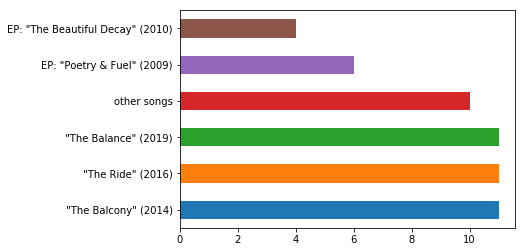

In [17]:
df.Album.value_counts().plot(kind='barh')

### Cleaning it up: Adding a Title and Axes
Here we import the pyplot class within the matplotlib package.  

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Album Title')

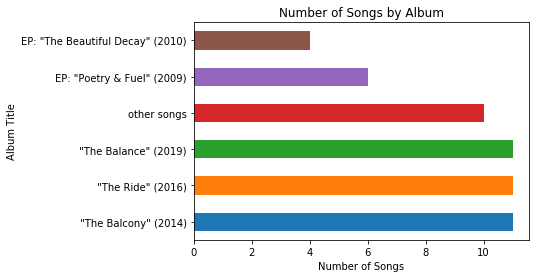

In [19]:
df.Album.value_counts().plot(kind='barh')
plt.title('Number of Songs by Album')
plt.xlabel('Number of Songs')
plt.ylabel('Album Title')

## Additional Resources

#### Beatiful Soup - a good go to tool for parsing the DOM
https://www.crummy.com/software/BeautifulSoup/?

#### Selenium - Browser automation (useful when you need to interact with javascript for more complex scraping)
https://www.seleniumhq.org/

#### Scrapy - another package for scraping larger datasets at scale
https://scrapy.org/

## Summary
You should now have a brief intro to web scraping! The possabilities are nearly endless with what you can do. That said, not all websites will be thrilled with your new prowess. Surfing the web at super human speeds will get you banned from many domains and may violate the terms & conditions of many websites that require login. As such, there are a few considerations you should take along your way.

* Is there a terms and conditions for using the website?
* Test your scraping bot on in small samples to debug before scaling to hundreds, thousands or millions of requests.
* Start thinking about your IP address: getting blacklisted from a website is no fun. Consider using a VPN.
* Slow your bot down! Add delays along the way with the time package. Specifically, time.sleep(seconds) adds wait time in a program.